In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
SEED = 42
DATA_DIR = Path("data")
DATASET_DIR = DATA_DIR / Path("Birds_25")
TRAIN_DIR = DATASET_DIR / Path("train")
VALID_DIR = DATASET_DIR / Path("valid")
LABELS_TXT = DATA_DIR / Path("bird.txt")

In [3]:
train_glob = TRAIN_DIR.glob("*/*")
train_files = []
train_labels = []
for _item in train_glob:
    train_files.append(_item)
    train_labels.append(_item.parent.name)

train_df = pd.DataFrame.from_dict({"image": train_files, "label": train_labels})
train_df["is_valid"] = False

valid_glob = VALID_DIR.glob("*/*")
valid_files = []
valid_labels = []
for _item in valid_glob:
    valid_files.append(_item)
    valid_labels.append(_item.parent.name)

valid_df = pd.DataFrame.from_dict({"image": valid_files, "label": valid_labels})
valid_df["is_valid"] = True

dataset_df = pd.concat([train_df, valid_df])
print(f"train_val ratio: {len(valid_df)/(len(train_df)+len(valid_df))}")
dataset_df.head()

train_val ratio: 0.2


,image,label,is_valid
0,data/Birds_25/train/Hoopoe/Hoopoe_859.jpg,Hoopoe,False
1,data/Birds_25/train/Hoopoe/Hoopoe_1326.jpg,Hoopoe,False
2,data/Birds_25/train/Hoopoe/Hoopoe_1481.jpg,Hoopoe,False
3,data/Birds_25/train/Hoopoe/Hoopoe_1031.jpg,Hoopoe,False
4,data/Birds_25/train/Hoopoe/Hoopoe_888.jpg,Hoopoe,False


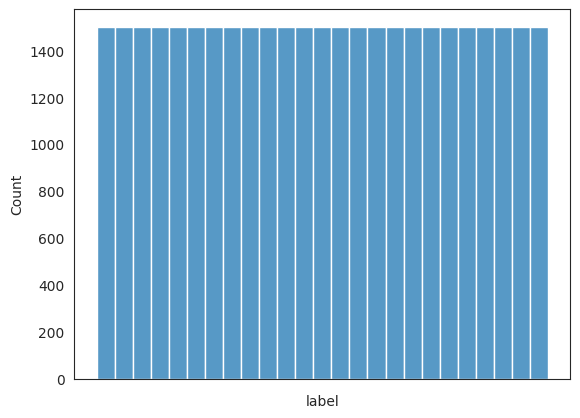

In [4]:
sns.set_style("white")
hist = sns.histplot(dataset_df["label"])
hist.set(xticklabels=[])
plt.show()

In [5]:
dataset_df.to_csv(DATA_DIR / Path("bird.csv"), index=False)

In [6]:
df_labels = np.sort(dataset_df["label"].unique()).tolist()
with open(DATA_DIR / Path("bird.txt"), "w") as f:
    for label in df_labels:
        f.write(label + "\n")
f.close()